Pamiętaj o zainstalowaniu pakietów: shapely, geopandas i mapclassify

In [2]:
%matplotlib inline
import geopandas as gpd
from matplotlib import pyplot as plt
import numpy as np

## Dane demograficzne w dzielnicach

Dane ładujemy za pomocą ``gpd.read_file()``. Należy pamiętać, że wszystkie typy plików razem z .shp powinny znaleźć się w tym samym folderze. Wczytaj dane geograficzne z roku 2019go:

In [10]:
maps = gpd.read_file('data/GraniceOsiedli/GraniceOsiedli.shp')
jebniecia = gpd.read_file('data/Wypadki_i_kolizje_drogowe/2019_zdarzenia_dr.shp')
szczegoly = gpd.read_file('data/Wypadki_i_kolizje_drogowe/2019_szczegoly_zdarzen_dr.shp')

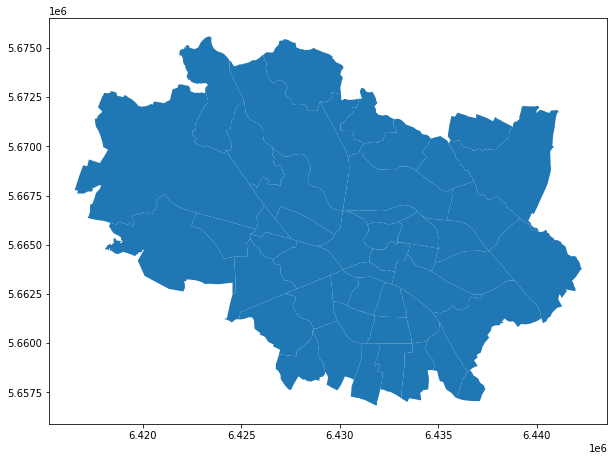

In [16]:
maps.plot(
    figsize=(10,10)
)


In [19]:
maps

,OBJECTID,NROSIEDLA,NAZWAOSIED,DATA,SHAPE_AREA,SHAPE_LEN,geometry
0,340,21,Krzyki - Partynice,2016-01-21,5.254965e+06,9994.583078,"POLYGON ((6430117.675 5660766.234, 6430140.266..."
1,341,24,Gądów - Popowice Płd.,2016-01-21,3.134569e+06,7588.647951,"POLYGON ((6429726.139 5665488.426, 6429713.546..."
2,348,42,Sołtysowice,2016-01-21,4.547041e+06,9003.773230,"POLYGON ((6435263.203 5670431.681, 6435329.046..."
3,349,18,Bieńkowice,2016-01-21,1.433161e+06,4760.314072,"POLYGON ((6437233.661 5657388.908, 6437126.750..."
4,351,32,Żerniki,2016-01-21,3.908726e+06,9132.805421,"POLYGON ((6425733.868 5665795.775, 6425733.316..."
5,352,29,Muchobór Wielki,2016-01-21,6.879545e+06,13228.130080,"POLYGON ((6426254.030 5664383.645, 6426256.162..."
6,353,10,Przedmieście Oławskie,2016-01-21,5.966906e+06,12448.378083,"POLYGON ((6433423.689 5664493.814, 6433426.060..."
7,354,14,Gaj,2016-01-21,2.588012e+06,6781.047181,"POLYGON ((6432224.458 5661350.458, 6432421.582..."
8,355,48,Wojszyce,2016-01-21,3.270306e+06,8956.676852,"POLYGON ((6433282.003 5659991.930, 6433318.396..."
9,356,15,Borek,2016-01-21,2.763975e+06,6899.239904,"POLYGON ((6430369.892 5661915.895, 6430573.717..."


KOLIZJE \
WYPADKI \
POJ_SUMA - Łączna liczba pojazdów \
POJ_ROWER - W tym rowery \
POJ_TRAM - w tym tramwaje \
POJ_BUS - W tym autobusy komunikacji publicznej \
UCZ_SUMA - Łączna liczba uczestników \
UCZ_PIESI - W tym piesi \
Z_SUMA - Liczba zabitych łącznie \
Z_PIESI - w tym Liczba zabitych pieszych\
Z_IN - w tym Liczba zabitych innych uczestników \
CR_SUMA - Liczba ciężko rannych pieszych \
CR_PIESI - w tym Liczba lekko rannych pieszych \
CR_IN - w tym Liczba ciężko rannych innych uczestników \
LR_SUMA - Liczba lekko rannych łącznie \
LR_PIESI - W tym piesi \
LR_IN - W tym inni \
DZIECI \
ROK

In [4]:
row_piesz = jebniecia[(jebniecia.UCZ_PIESI > 0) | (jebniecia.POJ_ROWER > 0)]

Posumujmy liczbę mieszkańców po kategorii wiekowej:

In [5]:
szczegoly[['UL', 'ADR', 'SKRZ_Z_UL', 'TYP',
       'RDZ', 'PRZYCZYNA', 'PARAM_MSCA', 'CHAR_MSCA', 'RDZ_DR', 'RDZ_NAW',
       'STAN_NAW', 'SYGN', 'OZN_POZ', 'OSW', 'WAR_ATM', 'USZK_P_POJ', 'ROK',
       'geometry']]


,UL,ADR,SKRZ_Z_UL,TYP,RDZ,PRZYCZYNA,PARAM_MSCA,CHAR_MSCA,RDZ_DR,RDZ_NAW,STAN_NAW,SYGN,OZN_POZ,OSW,WAR_ATM,USZK_P_POJ,ROK,geometry
0,al. Armii Krajowej,None,Borowska,kolizja,zderzenie pojazdów tylne,kierowca: niezachowanie bezp. odleg. między po...,skzyżowanie: Z drogą z pierwsz.,jezdnia,dwie jezdnie jednokierunkowe,twarda,sucha,"jest, nie działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6432374.532 5661350.827)
1,al. Armii Krajowej,None,Borowska,kolizja,zderzenie pojazdów tylne,kierowca: niezachowanie bezp. odleg. między po...,skzyżowanie: Z drogą z pierwsz.,jezdnia,jednojezdniowa dwukierunkowa,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6432374.532 5661350.827)
2,al. Armii Krajowej,None,Borowska,kolizja,zderzenie pojazdów tylne,kierowca: niezachowanie bezp. odleg. między po...,skzyżowanie: Z drogą z pierwsz.,jezdnia,jednojezdniowa dwukierunkowa,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6432374.532 5661350.827)
3,al. Armii Krajowej,None,Borowska,kolizja,zderzenie pojazdów boczne,kierowca: nieprawidłowe zmienianie pasa ruchu,skzyżowanie: Z drogą z pierwsz.,jezdnia,dwie jezdnie jednokierunkowe,twarda,sucha,"jest, działa",jest,noc - droga oświetlona,dobre warunki atmosferyczne,None,2019,POINT (6432374.532 5661350.827)
4,al. Armii Krajowej,None,Krakowska,kolizja,zderzenie pojazdów boczne,kierowca: nieustąpienie pierwszeństwa przejazdu,skzyżowanie: Z drogą z pierwsz.,jezdnia,jednokierunkowa,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6434831.560 5661693.732)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12849,al. Brücknera,None,Bolesława Krzywoustego,kolizja,zderzenie pojazdów tylne,kierowca: niezachowanie bezp. odleg. między po...,skzyżowanie: Z drogą z pierwsz.,jezdnia,dwie jezdnie jednokierunkowe,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6435760.106 5667577.008)
12850,al. Brücknera,None,Bolesława Krzywoustego,kolizja,zderzenie pojazdów boczne,kierowca: nieprawidłowe zmienianie pasa ruchu,skzyżowanie: Z drogą z pierwsz.,jezdnia,dwie jezdnie jednokierunkowe,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6435760.106 5667577.008)
12851,al. Brücknera,None,Bolesława Krzywoustego,kolizja,zderzenie pojazdów boczne,kierowca: niezachowanie bezp. odleg. między po...,skzyżowanie: Z drogą z pierwsz.,jezdnia,dwie jezdnie jednokierunkowe,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6435760.106 5667577.008)
12852,al. Brücknera,54,Bolesława Krzywoustego,kolizja,zderzenie pojazdów boczne,kierowca: niestosowanie się do sygnalizacji św...,skzyżowanie: Z drogą z pierwsz.,jezdnia,jednojezdniowa dwukierunkowa,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6435760.106 5667577.008)


Wykorzystajmy funkcję describe

In [6]:
szczegoly_row_piesz = szczegoly.iloc[row_piesz.index]
szczegoly_row_piesz

,POJ_SUMA,POJ_ROWER,POJ_TRAM,POJ_BUS,UCZ_SUMA,UCZ_PIESI,Z_SUMA,Z_PIESI,Z_IN,CR_SUMA,...,RDZ_DR,RDZ_NAW,STAN_NAW,SYGN,OZN_POZ,OSW,WAR_ATM,USZK_P_POJ,ROK,geometry
8,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,jednojezdniowa dwukierunkowa,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6430902.749 5658615.378)
45,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,jednojezdniowa dwukierunkowa,twarda,sucha,brak,jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6427203.268 5665780.407)
48,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,jednojezdniowa dwukierunkowa,twarda,sucha,brak,jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6427203.268 5665780.407)
50,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,jednokierunkowa,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6433392.439 5661313.785)
52,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,jednokierunkowa,twarda,sucha,brak,jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6433392.439 5661313.785)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9402,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,dwie jezdnie jednokierunkowe,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6428559.191 5662744.099)
9414,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,jednojezdniowa dwukierunkowa,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6433270.248 5664068.609)
9434,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,jednojezdniowa dwukierunkowa,twarda,sucha,brak,nie ma,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6427730.758 5660008.154)
9449,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,jednojezdniowa dwukierunkowa,twarda,sucha,brak,nie ma,światło dzienne,dobre warunki atmosferyczne,None,2019,POINT (6421775.738 5668306.795)


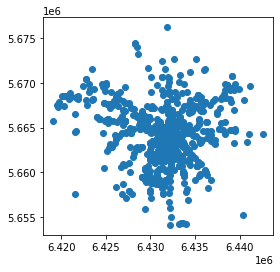

In [9]:
szczegoly_row_piesz.plot()

Wyplotujmy sobie przestrzenie zawarte w kolumnie 'geometry'

In [7]:
szczegoly_row_piesz['STAN_NAW'].value_counts()
# szczegoly_row_piesz['UL'].hist(bins=szczegoly_row_piesz['UL'].unique().size)
# help(szczegoly_row_piesz['UL'].hist)

sucha                                               648
mokra                                               145
oblodzenie, zaśnieżenie                               6
mokra;oblodzenie, zaśnieżenie                         5
sucha;dziury, wyboje                                  3
koleiny, garby                                        1
sucha;koleiny, garby                                  1
dziury, wyboje                                        1
kałuże, rozlewiska                                    1
mokra;kałuże, rozlewiska;oblodzenie, zaśnieżenie      1
Name: STAN_NAW, dtype: int64

Wyciągnij powierzchnię każdej dzielnicy za pomocą odpowiedniego parametru:

Wyplotujmy mapę przedstawiającą wartości wybranej zmiennej:

In [8]:
dane.plot(column='LUD_NA_KM2',
         legend=True,
         legend_kwds = {
             'label': 'Gęstość zaludnienia',
             'orientation': 'horizontal'
         },
         figsize=(8,8))
plt.title('Gęstość zaludnienia we Wro')

NameError: name 'dane' is not defined

Z legendą pod spodem

Zmieńmy kolorystykę za pomocą argumentu ``cmap``. Więcej opcji dostępnych tutaj:
https://matplotlib.org/tutorials/colors/colormaps.html

Wyplotuj jedynie granice:

In [ ]:
dane.boundary.plot(color='black')

Z automatycznym podziałem na kategorie:

metody: ‘box_plot’, ‘equal_interval’, ‘fisher_jenks’, ‘fisher_jenks_sampled’, ‘headtail_breaks’, ‘jenks_caspall’, ‘jenks_caspall_forced’, ‘jenks_caspall_sampled’, ‘max_p_classifier’, ‘maximum_breaks’, ‘natural_breaks’, ‘quantiles’, ‘percentiles’, ‘std_mean’ or ‘user_defined’

In [ ]:
dane.plot(column='LUD_NA_KM2',
         legend=True,
         figsize=(8,8),
         cmap='Pastel2',
         scheme='equal_interval')
plt.title('Gęstość zaludnienia we Wro')

Co w przypadku kiedy mamy brakujące dane?

In [ ]:
dane['LUD_NA_KM2'].iloc[0:5,] = np.nan

In [ ]:
dane.plot(column='LUD_NA_KM2',
         legend=True,
         figsize=(8,8),
         cmap='hot',
         scheme='equal_interval',
         missing_kwds={
             'color': 'grey',
             'label': 'Brak danych',
             'edgecolor': 'white',
             'hatch': '//'
         })
plt.title('Gęstość zaludnienia we Wro')

## Wypadki i zdarzenia drogowe

Pobierzmy kolejny zbiór danych - dotyczący wypadków i zdarzeń drogowych w 2019 roku

In [ ]:
wypadki = gpd.read_file('Wypadki_i_kolizje_drogowe/2019_szczegoly_zdarzen_dr.shp')

In [ ]:
wypadki

Jakiego typu są obiekty w kolumnie 'geometry'

In [ ]:
type(wypadki['geometry'])

Przedstaw je na wykresie

In [ ]:
wypadki.plot()

Wyciągnij wypadki, gdzie była conajmniej jedna ofiara śmiertelna

In [ ]:
wypadki[wypadki['Z_SUMA'] > 0].plot()
plt.title('Wypadki śmiertelne')

Nanieś punkty z wypadków śmiertelnych na mapę wrocławia:

In [ ]:
wykres = dane.plot(
    figsize=(10,10), alpha=0.3
)
wypadki[wypadki['Z_SUMA'] > 0].plot(ax=wykres, color='red')

Za pomocą operacji w geopandasie oblicz liczbę wypadków w 2019 per osiedle. Wykorzystaj łączenie danych geograficznych
https://geopandas.org/mergingdata.html

In [ ]:
liczba_wypadkow = gpd.sjoin(dane[['NAZWA', 'geometry']], wypadki[['geometry']]).groupby(['NAZWA']).size()

Wyplotuj mapę wrocławia w zależności od liczby wypadków

In [ ]:
dane[['NAZWA', 'geometry']].merge(liczba_wypadkow.rename('new'), left_on='NAZWA', right_index=True).plot(
    column='new',
    legend=True
)

## Ścieżki rowerowe

Wczytaj informacje o danych dotyczących tras_rowerowych

In [ ]:
sciezki = gpd.read_file('trasy_rowerowe/TrasyRowerowe.shp')

Ile mamy obserwacji w zbiorze?

In [ ]:
sciezki.shape

Jakie są tam kolumny i dane?

In [ ]:
sciezki.dtypes

Jakie są typy ścieżek rowerowych?

In [ ]:
sciezki['TYP'].unique()

Jakiego typu są elementy w kolumnie ``geometry``?

In [ ]:
sciezki['geometry']

Jaką długość mają linie wyznaczone przez ``geometry``?

In [ ]:
sciezki['geometry'].length

Jaką długość mają wszystkie ścieżki rowerowe w mieście?

In [ ]:
sciezki['geometry'].length.sum() / 1000 #km

Ile Wrocław ma kilometrów dróg typu 'droga dla rowerów'

In [ ]:
sciezki[sciezki['TYP'] == 'droga dla rowerów']['geometry'].length.sum() / 1000

In [ ]:
wykres = dane.plot(figsize=(15,15), alpha=0.3)
sciezki.plot(column='TYP', ax=wykres, legend=True, legend_kwds={'loc': 'lower left'})

## Zadania samodzielne

Zadanie samodzielne:

Wczytaj dane punktowe dotyczące wysokości budynków. Połącz punkty z odpowiadającymi im dzielnicami, i oblicz średnią wysokość budynków per dzielnica. Wyniki przedstaw na mapie

Zadanie samodzielne 2:

Oblicz która dzielnica ma najwięcej dróg rowerowy na kilometr kwadratowy powierzchni. Hint: dokonaj spatial joina między dzielnicami i linestringami, a następnie posumuj długość ścieżek dla dzielnicy (``.length`` i podziel przez powierzchnię ``.area``)